# Import Libraries  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import matplotlib.pyplot as plt

# Import Data

In [2]:
dengue=pd.read_csv('Dengue.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

# Data management 

In [3]:
dengue['city'] = dengue['city'].astype('category')
sub1=dengue[(dengue['city']=='iq')]
sub2=dengue[(dengue['city']=='sj')]

# Box Plot

<IPython.core.display.Javascript object>


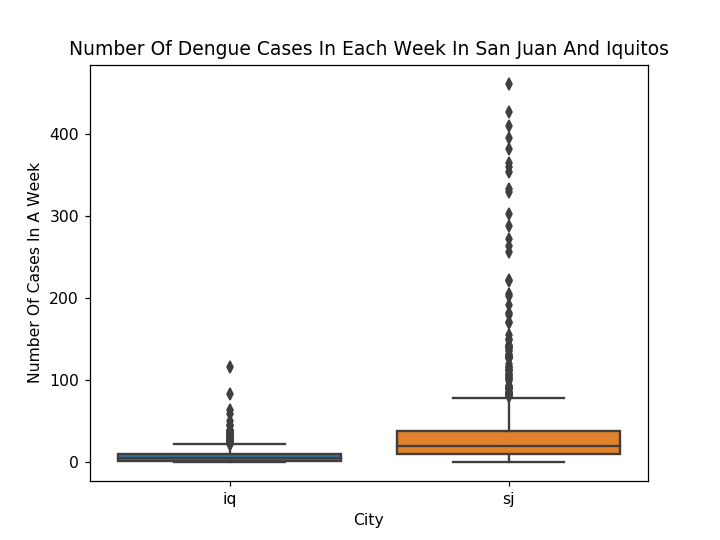

Text(0.5,1,'Number Of Dengue Cases In Each Week In San Juan And Iquitos')

In [4]:
%matplotlib notebook
sns.boxplot(x='city', y='total_cases', data=dengue)
plt.xlabel('City')
plt.ylabel('Number Of Cases In A Week')
plt.title('Number Of Dengue Cases In Each Week In San Juan And Iquitos')


# ANOVA

In [5]:
anova_analysis= smf.ols(formula= 'total_cases ~ C(city)',data=dengue).fit()
print(anova_analysis.summary())

                            OLS Regression Results                            
Dep. Variable:            total_cases   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     115.0
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           8.08e-26
Time:                        15:15:59   Log-Likelihood:                -7127.2
No. Observations:                1377   AIC:                         1.426e+04
Df Residuals:                    1375   BIC:                         1.427e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6629      2.038      3.760

In [6]:
dengue1=dengue[['total_cases','city']].dropna()

In [7]:
print('Mean for total number of cases (total_cases) by two cities: Iquitos (Iq) and San Juan (sj)')
dengue_mean=dengue1.groupby('city').mean()
print(dengue_mean)

Mean for total number of cases (total_cases) by two cities: Iquitos (Iq) and San Juan (sj)
      total_cases
city             
iq       7.662896
sj      34.185027


In [8]:
print ('Standard deviations for total number of cases (total_cases) by two cities: Iquitos (Iq) and San Juan (sj)')
dengue_std=dengue1.groupby('city').std()
print(dengue_std)

Standard deviations for total number of cases (total_cases) by two cities: Iquitos (Iq) and San Juan (sj)
      total_cases
city             
iq      11.295332
sj      51.408689
